Nama : Juandhani Abimanyu

NIM : 211351069

Kelas : Malam B

# Import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juandhaniabimanyu","key":"f438589ce1966229b518af7929268bc8"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/german-credit

  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 18.5MB/s]


In [4]:
!mkdir german-credit
!unzip german-credit.zip -d german-credit
!ls german-credit

Archive:  german-credit.zip
  inflating: german-credit/german_credit_data.csv  
german_credit_data.csv


# Import library yang digunakan

In [5]:
pip install kneed

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")

# Data Discovery

In [7]:
df = pd.read_csv('/content/german-credit/german_credit_data.csv', encoding='latin1')

In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [10]:
df.shape

(1000, 10)

In [11]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

# EDA

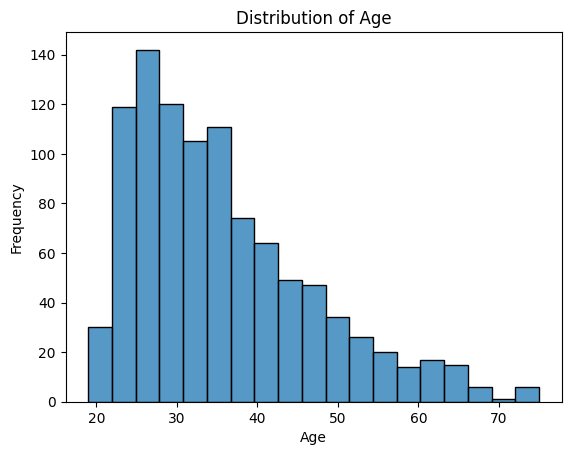

In [12]:
sns.histplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


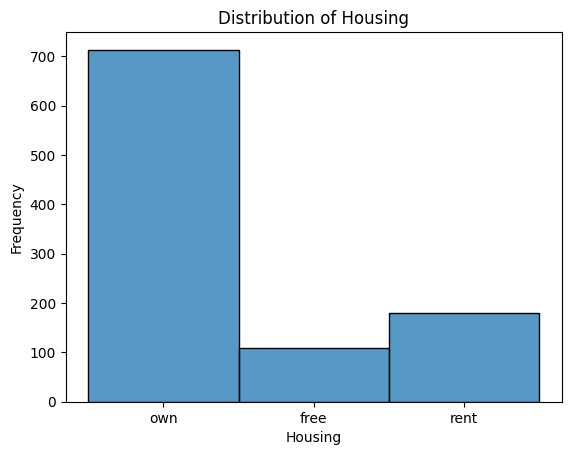

In [13]:
sns.histplot(df['Housing'])
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.title('Distribution of Housing')
plt.show()

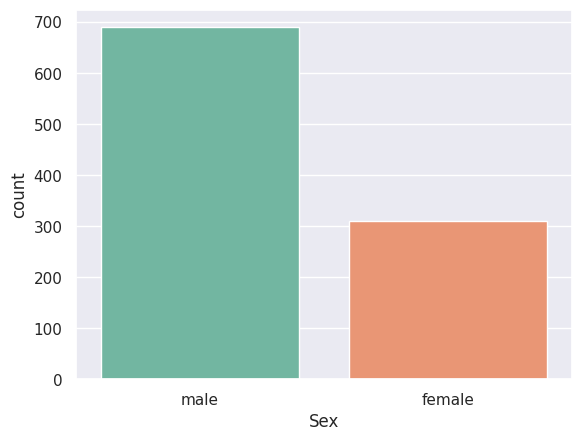

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Sex', data=df, palette="Set2")
plt.show()

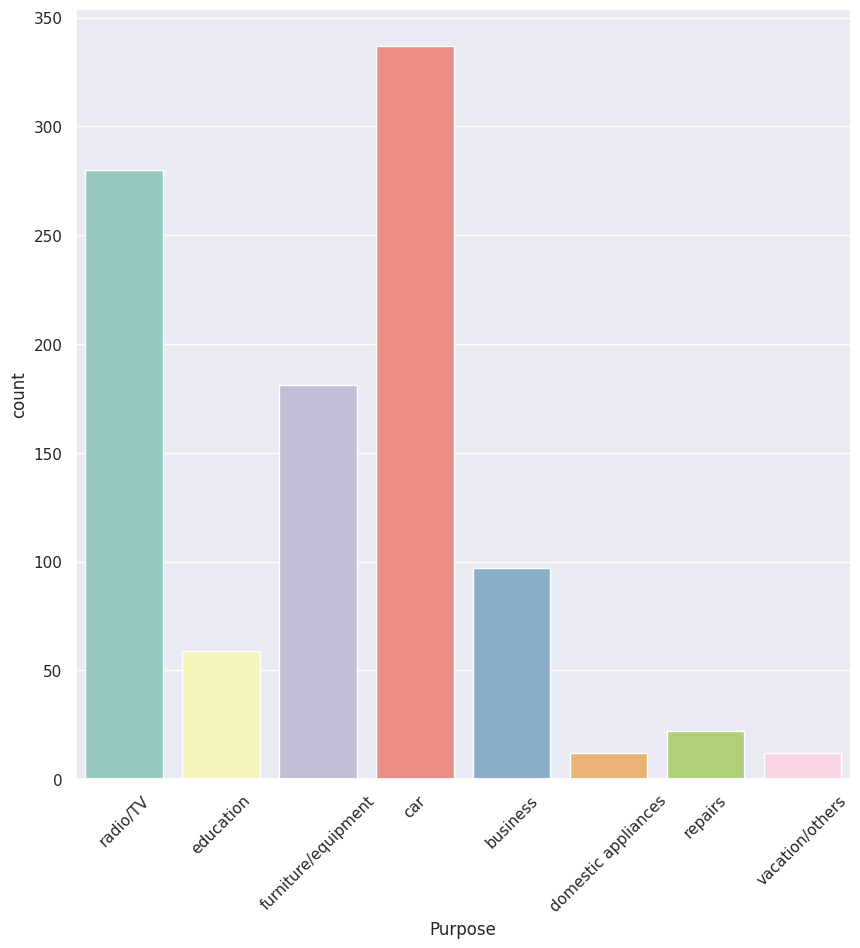

In [15]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x='Purpose', data=df, palette="Set3")
plt.xticks(rotation=45)

plt.show()

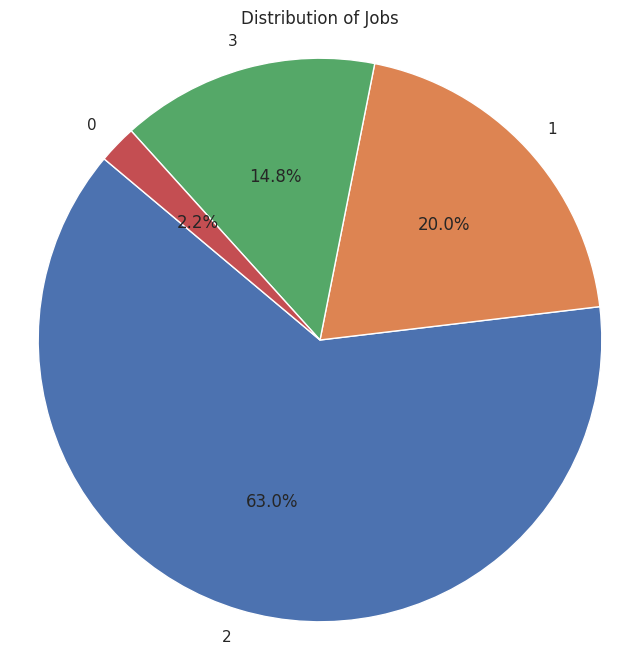

In [16]:
# Menghitung jumlah masing-masing nilai dalam kolom 'Job'
job_counts = df['Job'].value_counts()

# Plot diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Jobs')
plt.axis('equal')  # Memastikan lingkaran terlihat sempurna bulat
plt.show()

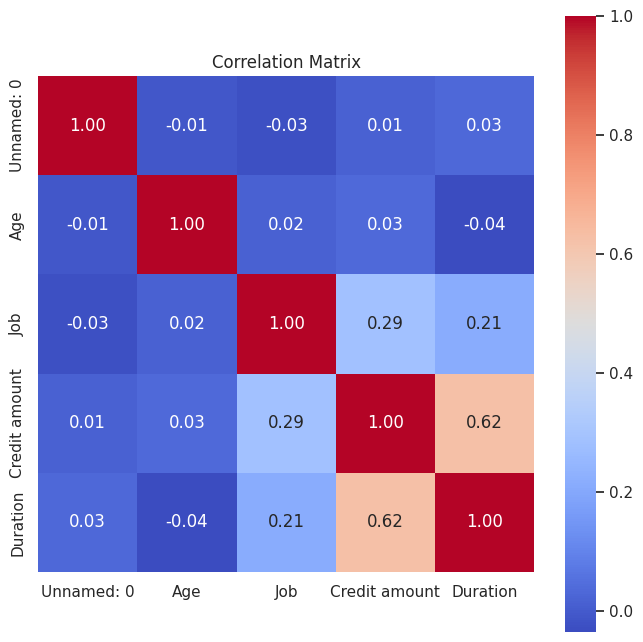

In [17]:
def plot_correlation_matrix(df, size):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(df, 8)

# Preprocessing

In [18]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [19]:
df= df.fillna('unknown')
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',]

In [21]:
for i, cat in enumerate(categorical_features):
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [22]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


# Modeling

In [23]:
num_df = df[['Age', 'Duration', 'Credit amount']]
num_df.head()

,Age,Duration,Credit amount
0,67,6,1169
1,22,48,5951
2,49,12,2096
3,45,42,7882
4,53,24,4870


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)


In [25]:
print(num_df_scaled.shape)
num_df_scaled

(1000, 3)


array([[ 2.76645648, -1.23647786, -0.74513141],
       [-1.19140394,  2.24819436,  0.94981679],
       [ 1.18331231, -0.73866754, -0.41656241],
       ...,
       [ 0.21583532, -0.73866754, -0.87450324],
       [-1.10345149,  1.9992892 , -0.50552769],
       [-0.75164167,  1.9992892 ,  0.46245715]])

In [26]:
inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    #membuat model dengan range k
    kmeans = KMeans(n_clusters = k, n_init=10)
    #fit model
    kmeans.fit(num_df_scaled)
    #tambahkan SSE dalam klaster k ke dalam daftar
    inertia.append(kmeans.inertia_)

In [27]:
# mencari elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 3 clusters


In [28]:
km = KMeans(n_clusters=K_cost_c3, random_state=0)
clusters = km.fit_predict(num_df_scaled)


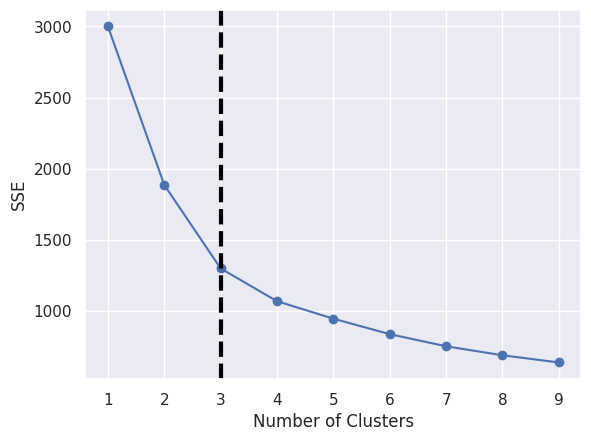

In [29]:
#Plot grafik
plt.plot(num_clusters , inertia , 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot garis vertikal di elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

# VISUALISASI HASIL ALGORITMA

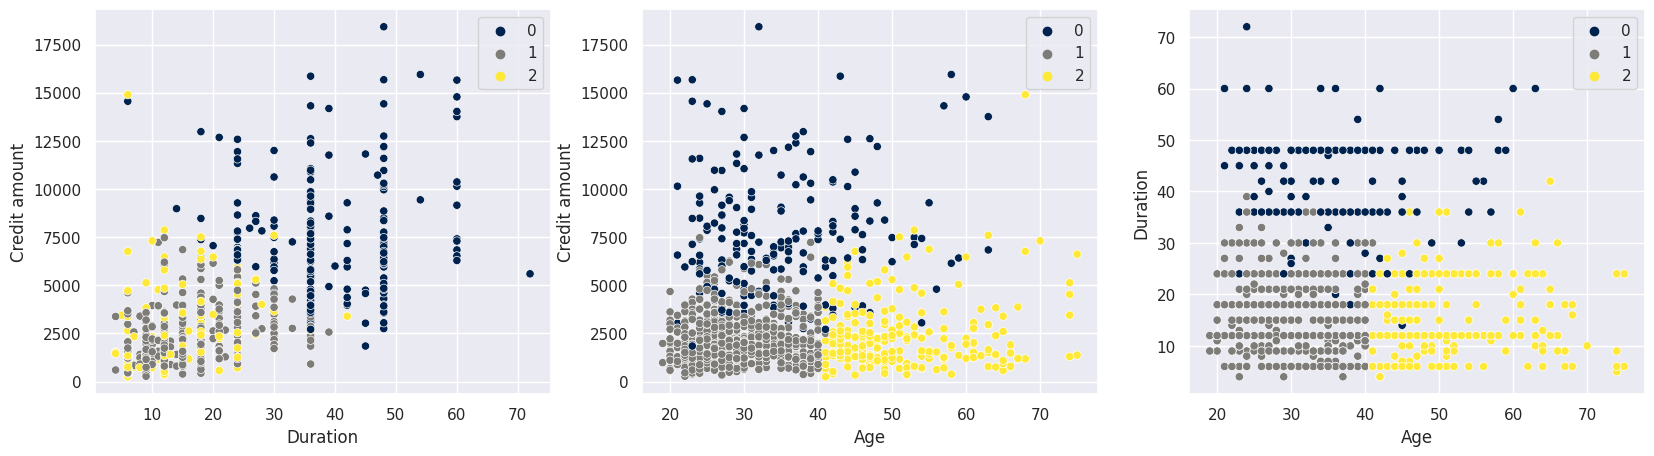

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data=df, x='Duration', y='Credit amount', hue=clusters, ax=ax[0], palette='cividis')
sns.scatterplot(data=df, x='Age', y='Credit amount', hue=clusters, ax=ax[1], palette='cividis')
sns.scatterplot(data=df, x='Age', y='Duration', hue=clusters, ax=ax[2], palette='cividis')
plt.show()


In [31]:
df_clustered = df[['Age', 'Duration', 'Credit amount']]
df_clustered['Labels'] = clusters

In [32]:
df_clustered.head()

,Age,Duration,Credit amount,Labels
0,67,6,1169,2
1,22,48,5951,0
2,49,12,2096,2
3,45,42,7882,0
4,53,24,4870,2


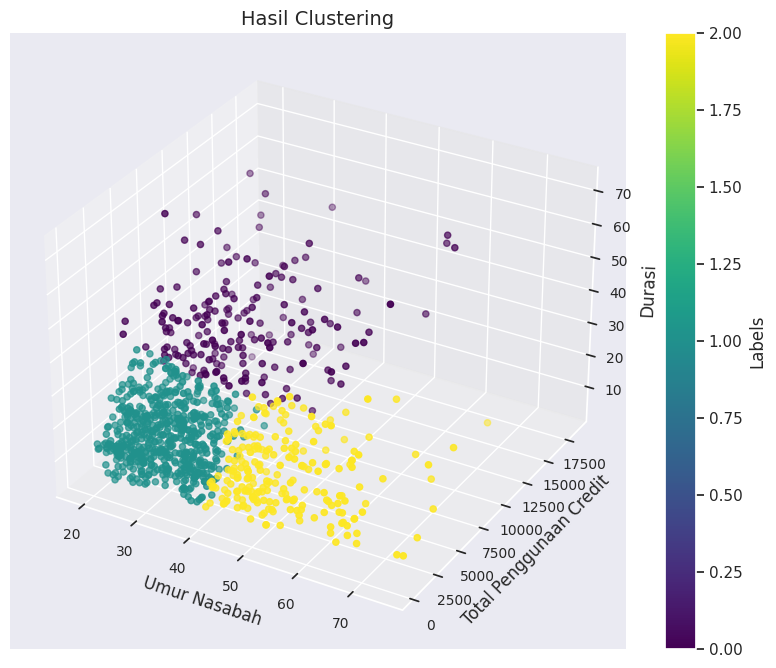

In [33]:
# Membuat figure dengan ukuran tertentu
fig = plt.figure(figsize=(10, 8))

# Membuat subplot 3D
ax = fig.add_subplot(111, projection='3d')

# Melakukan scatter plot dengan data yang dimiliki
scatter = ax.scatter(xs=df_clustered['Age'], ys=df_clustered['Credit amount'], zs=df_clustered['Duration'], c=df_clustered['Labels'], cmap='viridis')

# Menambahkan label pada sumbu x, y, dan z
ax.set_xlabel('Umur Nasabah', fontsize=12)
ax.set_ylabel('Total Penggunaan Credit', fontsize=12)
ax.set_zlabel('Durasi', fontsize=12)

# Menambahkan judul pada plot
plt.title('Hasil Clustering', fontsize=14)

# Menyesuaikan ukuran teks untuk tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Menampilkan colorbar
plt.colorbar(scatter, ax=ax, label='Labels')

# Menampilkan plot
plt.show()

# SAVE HASIL CLUSTER

In [34]:
df_clustered.head()

,Age,Duration,Credit amount,Labels
0,67,6,1169,2
1,22,48,5951,0
2,49,12,2096,2
3,45,42,7882,0
4,53,24,4870,2


In [36]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [35]:
df_clustered.to_excel('output_cluster.xlsx')

In [37]:
df.to_excel('dataset.xlsx')